# Inspect models in arxiv

In [18]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import os
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120

from lace.emulator import p1d_archive
from lace.emulator import p1d_archive_Nyx

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Specify suite of simulations to use and read metadata

In [19]:
# option to store only a fraction of the redshifts, to make lighter emulators
undersample_z=1
basedir='lace/emulator/sim_suites/Australia20/'
skewers_label='Ns500_wM0.05'
arxiv=p1d_archive.archiveP1D(basedir=basedir,skewers_label=skewers_label,
                         undersample_z=undersample_z,verbose=True)

latin hyper-cube data {'param_space': {'Delta2_star': {'ip': 0, 'min_val': 0.25, 'max_val': 0.45, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$\\Delta^2_\\star$'}, 'n_star': {'ip': 1, 'min_val': -2.35, 'max_val': -2.25, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$n_\\star$'}, 'heat_amp': {'ip': 2, 'min_val': 0.5, 'max_val': 1.5, 'latex': '$H_A$'}, 'heat_slo': {'ip': 3, 'min_val': -0.5, 'max_val': 0.5, 'latex': '$H_S$'}, 'z_rei': {'ip': 4, 'min_val': 5.5, 'max_val': 15.0, 'latex': '$z_r$'}}, 'nsamples': 30, 'samples': {'0': [0.3466666666666667, -2.3316666666666666, 1.15, -0.35, 10.725000000000001], '1': [0.34, -2.2983333333333333, 0.7833333333333333, -0.15000000000000002, 5.658333333333333], '2': [0.3933333333333333, -2.305, 1.0166666666666666, 0.44999999999999996, 13.891666666666666], '3': [0.4, -2.335, 1.1166666666666667, 0.1166666666666667, 11.991666666666667], '4': [0.36, -2.275, 1.2166666666666666, -0.2833333333333333, 11.041666666666666], '5': [0.2733333333333333, -2.2583333333333333, 1.

26 sample has sim params = [0.41333333333333333, -2.341666666666667, 0.7166666666666667, -0.41666666666666663, 8.825]
simulation has 11 redshifts
undersample_z = 1
Use linP_zs from parameter.json
27 sample has sim params = [0.28, -2.3183333333333334, 1.4166666666666667, -0.45, 13.575000000000001]
simulation has 11 redshifts
undersample_z = 1
Use linP_zs from parameter.json
28 sample has sim params = [0.25333333333333335, -2.325, 0.55, -0.3833333333333333, 12.625]
simulation has 11 redshifts
undersample_z = 1
Use linP_zs from parameter.json
29 sample has sim params = [0.35333333333333333, -2.3483333333333336, 1.4833333333333334, 0.3833333333333333, 7.558333333333334]
simulation has 11 redshifts
undersample_z = 1
Use linP_zs from parameter.json
archive setup, containing 990 entries


In [20]:
Nmodels=len(arxiv.data)
print('# models =',Nmodels)

# models = 990


In [21]:
min(arxiv.z)

2.0

In [22]:
labels=[r'$\Delta_p^2$',r'$n_p$',r'$\bar F$',r'$\sigma_T$ [Mpc]',r'$\gamma$',r'$k_F$ [1/Mpc]']
Npar=len(labels)
database=np.empty([Nmodels,Npar])
database[:,0]=arxiv.Delta2_p
database[:,1]=arxiv.n_p
database[:,2]=arxiv.mF
database[:,3]=arxiv.sigT_Mpc
database[:,4]=arxiv.gamma
database[:,5]=arxiv.kF_Mpc

In [23]:
for i in range(Npar):
    print(i,labels[i],min(database[:,i]),max(database[:,i]))

0 $\Delta_p^2$ 0.13507290215457793 0.781070326213063
1 $n_p$ -2.3483338053660816 -2.2516665156556686
2 $\bar F$ 0.12884135434473798 0.8831448200943278
3 $\sigma_T$ [Mpc] 0.07731060572207873 0.1548976469710291
4 $\gamma$ 1.1159244635882688 1.82432761190542
5 $k_F$ [1/Mpc] 7.904313135512917 18.452192256320394


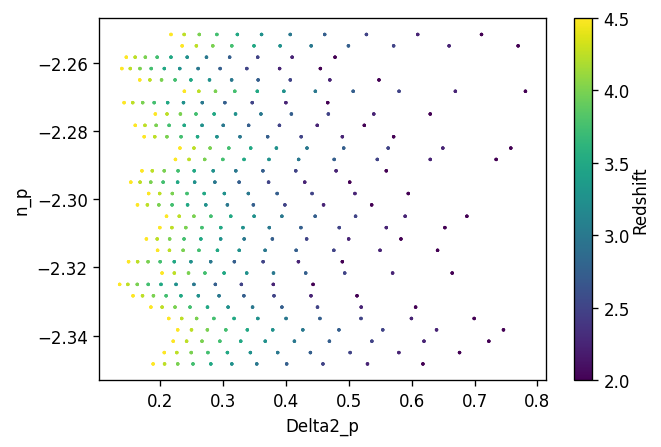

In [24]:
arxiv.plot_samples('Delta2_p','n_p')

In [25]:
arxiv.get_param_values('n_p').size

990

In [26]:
for key,value in arxiv.cube_data.items():
    print(key)

param_space
nsamples
samples


In [27]:
arxiv.cube_data['param_space']

{'Delta2_star': {'ip': 0,
  'min_val': 0.25,
  'max_val': 0.45,
  'z_star': 3.0,
  'kp_Mpc': 0.7,
  'latex': '$\\Delta^2_\\star$'},
 'n_star': {'ip': 1,
  'min_val': -2.35,
  'max_val': -2.25,
  'z_star': 3.0,
  'kp_Mpc': 0.7,
  'latex': '$n_\\star$'},
 'heat_amp': {'ip': 2, 'min_val': 0.5, 'max_val': 1.5, 'latex': '$H_A$'},
 'heat_slo': {'ip': 3, 'min_val': -0.5, 'max_val': 0.5, 'latex': '$H_S$'},
 'z_rei': {'ip': 4, 'min_val': 5.5, 'max_val': 15.0, 'latex': '$z_r$'}}

In [28]:
arxiv.cube_data

{'param_space': {'Delta2_star': {'ip': 0,
   'min_val': 0.25,
   'max_val': 0.45,
   'z_star': 3.0,
   'kp_Mpc': 0.7,
   'latex': '$\\Delta^2_\\star$'},
  'n_star': {'ip': 1,
   'min_val': -2.35,
   'max_val': -2.25,
   'z_star': 3.0,
   'kp_Mpc': 0.7,
   'latex': '$n_\\star$'},
  'heat_amp': {'ip': 2, 'min_val': 0.5, 'max_val': 1.5, 'latex': '$H_A$'},
  'heat_slo': {'ip': 3, 'min_val': -0.5, 'max_val': 0.5, 'latex': '$H_S$'},
  'z_rei': {'ip': 4, 'min_val': 5.5, 'max_val': 15.0, 'latex': '$z_r$'}},
 'nsamples': 30,
 'samples': {'0': [0.3466666666666667,
   -2.3316666666666666,
   1.15,
   -0.35,
   10.725000000000001],
  '1': [0.34,
   -2.2983333333333333,
   0.7833333333333333,
   -0.15000000000000002,
   5.658333333333333],
  '2': [0.3933333333333333,
   -2.305,
   1.0166666666666666,
   0.44999999999999996,
   13.891666666666666],
  '3': [0.4,
   -2.335,
   1.1166666666666667,
   0.1166666666666667,
   11.991666666666667],
  '4': [0.36,
   -2.275,
   1.2166666666666666,
   -0.28333

In [29]:
fname='/Users/font/Codes/montepython/data/Lya_DESI/models.hdf5'
nyx=p1d_archive_Nyx.archiveP1D_Nyx(fname=fname,verbose=False)

CROSS-CHECK BARYON DENSITY
CROSS-CHECK BARYON DENSITY
CROSS-CHECK BARYON DENSITY
CROSS-CHECK BARYON DENSITY


In [30]:
nyx

In [31]:
nyx.cube_data['samples']

[{'A_UVB': 1.217857142857143,
  'A_lya': 10.285709844334082,
  'A_s': 2.265935e-09,
  'H_0': 64.60714285714286,
  'Omega_m': 0.36314563782035697,
  'h': 0.6460714285714286,
  'n_lya': -2.368573003251007,
  'n_s': 0.9425047,
  'omega_m': 0.15158,
  'sigma8': 0.8780869478586525},
 {'A_UVB': 0.9035714285714286,
  'A_lya': 9.257130364192312,
  'A_s': 1.42575e-09,
  'H_0': 70.35000000000001,
  'Omega_m': 0.3211362937859906,
  'h': 0.7035000000000001,
  'n_lya': -2.265714265424552,
  'n_s': 1.032677,
  'omega_m': 0.1589342857142857,
  'sigma8': 0.7632526574248603},
 {'A_UVB': 1.375,
  'A_lya': 9.771423534128635,
  'A_s': 2.964874e-09,
  'H_0': 67.47857142857143,
  'Omega_m': 0.27905937857541296,
  'h': 0.6747857142857143,
  'n_lya': -2.40286010139207,
  'n_s': 0.9540153,
  'omega_m': 0.12706571428571428,
  'sigma8': 0.8929887518392494},
 {'A_UVB': 0.5892857142857143,
  'A_lya': 11.314292524397574,
  'A_s': 2.471032e-09,
  'H_0': 68.43571428571428,
  'Omega_m': 0.2870108283340629,
  'h': 0.68

In [32]:
nyx.print_entry(0,keys=['z','Delta2_p','n_p','alpha_p','f_p','mF','sigT_Mpc','gamma'])

entry = 0, z = 2.8000, Delta2_p = 0.4628, n_p = -2.3079, alpha_p = -0.2238, f_p = 0.9824, mF = 0.6945, sigT_Mpc = 0.1358, gamma = 1.3190


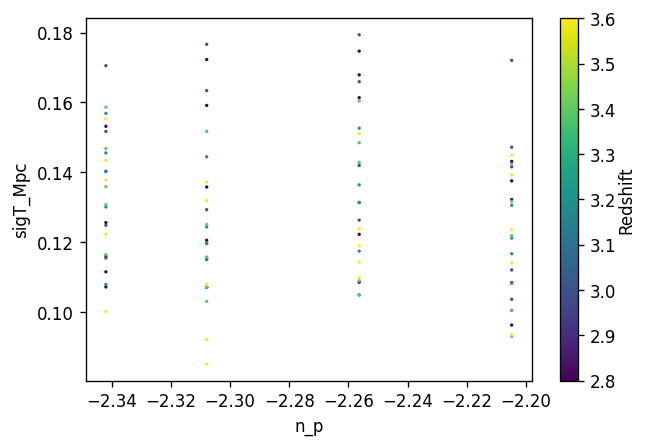

In [33]:
nyx.plot_samples('n_p','sigT_Mpc')

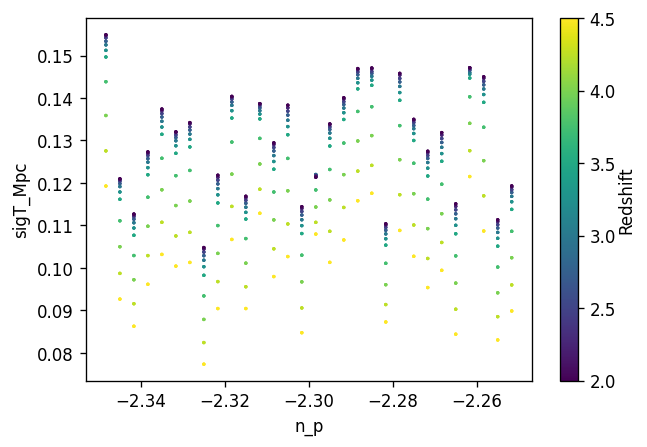

In [34]:
arxiv.plot_samples('n_p','sigT_Mpc')